In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing

In [2]:
%ls

drive/  sample_data/  Titanic-Dataset.csv


In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
# (number of samples, number of features)
df.shape

(891, 12)

##### Questions to think about ....
- What does a typical datapoint look like?
- What is the size of my data?
- Is my data balanced?
- Are there any missing values?

# Overall information of the data
- Check the data types and for missing values
- we can see Age and Cabin are missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Look at values and determine what may need to be encoded
- Sex is in string format with values male and female so it needs changed / mapped to 0 and 1
- PassengerId, Name, Ticket, and Cabin do not seem useful so we will remove those

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [9]:
# drop the columns that are known now will not be used
df = df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df.dropna(subset=['Embarked'], inplace=True)

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
label_encoder = preprocessing.LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [13]:
# Convert 'Sex' column to binary values: 0 for male and 1 for female
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

<Axes: >

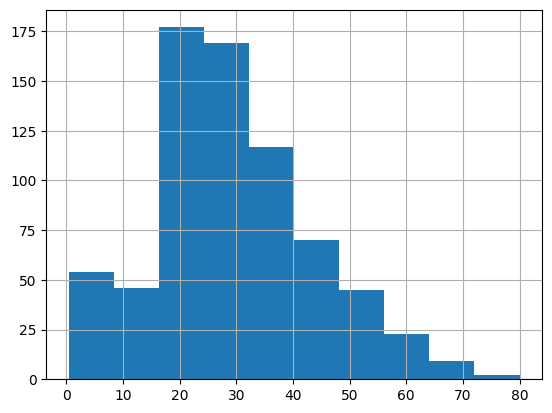

In [14]:
# use the distribution to determine if mean or median will be better to fill in values for Age
df["Age"].hist()

In [15]:
# because data is skewed used Median
df["Age"] = df["Age"].fillna(df["Age"].median())

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


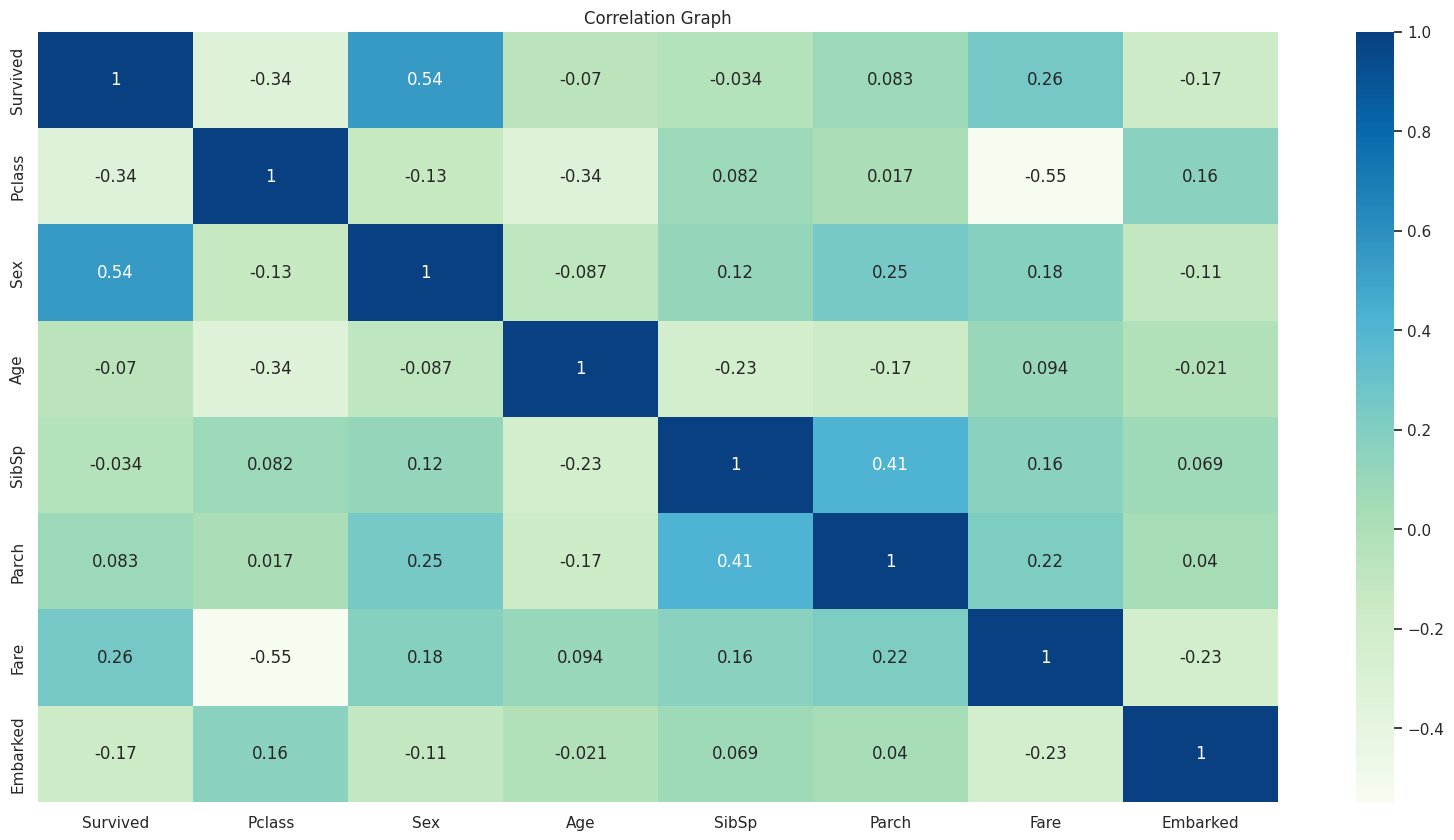

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

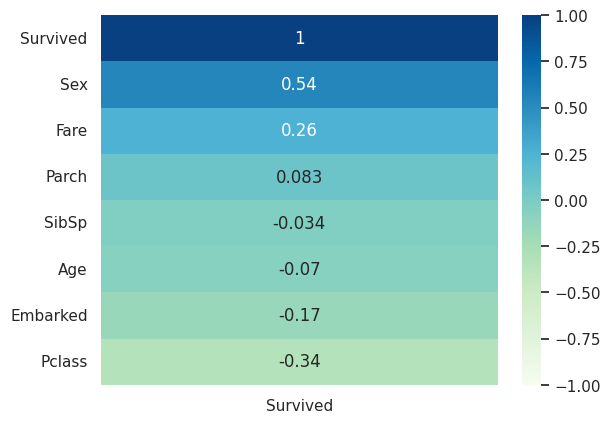

In [18]:
# Plotting the heatmap to check the correlation between the Target Label and other features
sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.350956,29.315152,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<ipython-input-20-0e18cf80332a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

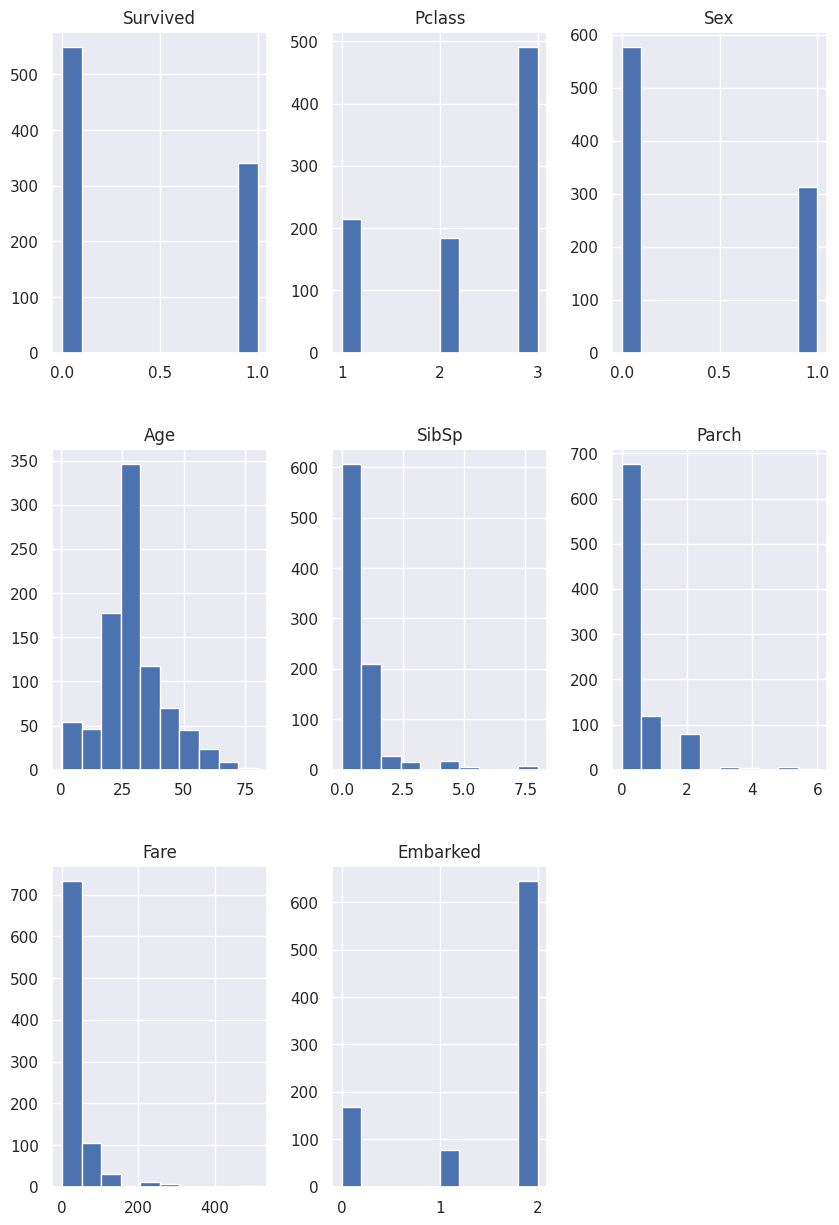

In [20]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)

In [21]:
# Separate the target and predictors
X=df.drop('Survived',axis=1)
y = df['Survived']

In [22]:
# shows unbalanced data
y.value_counts()

,count
Survived,
0,549
1,340


In [26]:
# source: https://www.kaggle.com/code/walidabdelhameed/apply-10-models-to-titanic-dataset?scriptVersionId=196557170&cellId=43
# SMOTE over samples the minority class, in this case survivors (1)
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X,y)
print(Counter(y_res))
x_res.shape,y_res.shape

Counter({0: 549, 1: 549})


((1098, 7), (1098,))

In [27]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size =0.2, random_state=42)

In [28]:
y_train.value_counts()

,count
Survived,
1,442
0,436


In [29]:
y_test.value_counts()

,count
Survived,
0,113
1,107


In [31]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Predict on the test set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [33]:
scores = {}
metrics = ['Accuracy', 'F1-Score']
scores['training'] = [round(accuracy_score(y_train, y_train_pred), 3),\
                     round(f1_score(y_train, y_train_pred), 3)]
scores['testing'] = [round(accuracy_score(y_test, y_test_pred), 3),\
                     round(f1_score(y_test, y_test_pred), 3)]
scores_df = pd.DataFrame(scores, index=metrics)
scores_df

,training,testing
Accuracy,0.778,0.782
F1-Score,0.775,0.778
